<a href="https://colab.research.google.com/github/panditrahulsharma/www.roomseeker.in/blob/master/Visualize_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.getcwd()
os.chdir('/content/drive/My Drive/zomato/')



The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location.

    What kind of a food is more popular in a locality.
    Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as • Location of the restaurant • Approx Price of food Theme based restaurant or not
    Which locality of that city serves that cuisines with maximum number of restaurants • The needs of people who are striving to get the best cuisine of the neighborhood • Is a particular neighborhood famous for its own kind of food.



In [0]:
#import basic library
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium
from folium import plugins
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


#install some specific library 
https://pypi.org/project/geolocation-python/


In [0]:
#!pip install geolocation-python
#!pip install opencage
#!pip install geopy

In [0]:
#load dataset
df=pd.read_csv("zomato.csv")

In [0]:
#Getting basic ideas about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [0]:
df.isnull().any(axis=0)

url                            False
address                        False
name                           False
online_order                   False
book_table                     False
rate                            True
votes                          False
phone                           True
location                        True
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
dtype: bool

In [0]:
print("Percentage null or na values in df")
print(((df.isnull() | df.isna()).sum() * 100 / df.index.size).round())

Percentage null or na values in df
url                             0.0
address                         0.0
name                            0.0
online_order                    0.0
book_table                      0.0
rate                           15.0
votes                           0.0
phone                           2.0
location                        0.0
rest_type                       0.0
dish_liked                     54.0
cuisines                        0.0
approx_cost(for two people)     1.0
reviews_list                    0.0
menu_item                       0.0
listed_in(type)                 0.0
listed_in(city)                 0.0
dtype: float64




Columns description

    url contains the url of the restaurant in the zomato website

    address contains the address of the restaurant in Bengaluru

    name contains the name of the restaurant

    online_order whether online ordering is available in the restaurant or not

    book_table table book option available or not

    rate contains the overall rating of the restaurant out of 5

    votes contains total number of rating for the restaurant as of the above mentioned date

    phone contains the phone number of the restaurant

    location contains the neighborhood in which the restaurant is located

    rest_type restaurant type

    dish_liked dishes people liked in the restaurant

    cuisines food styles, separated by comma

    approx_cost(for two people) contains the approximate cost for meal for two people

    reviews_list list of tuples containing reviews for the restaurant, each tuple

    menu_item contains list of menus available in the restaurant

    listed_in(type) type of meal

    listed_in(city) contains the neighborhood in which the restaurant is listed



# #Exploratory data analysis


**bold text**
#1.Which are the top restaurant chains in Bangaluru? 


Text(0.5, 0, 'Number of outlets')

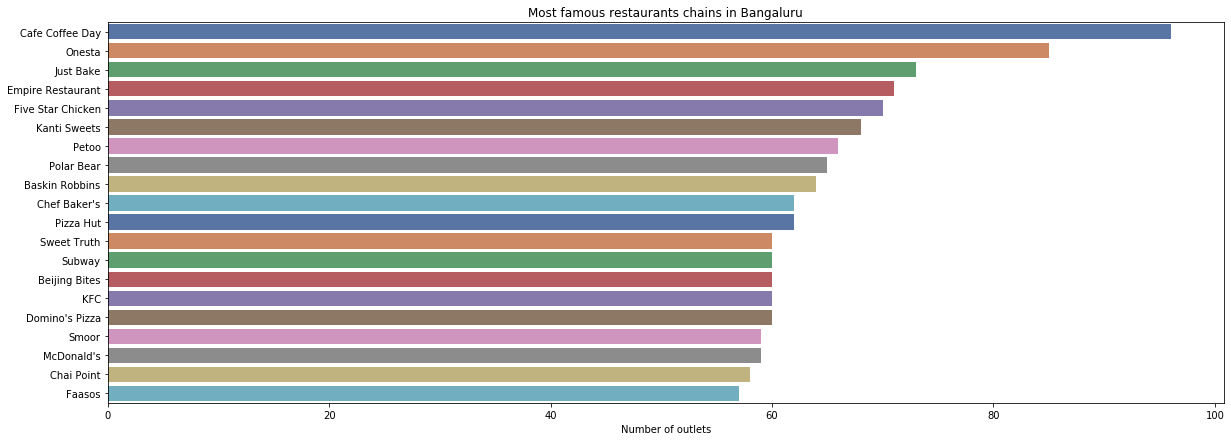

In [0]:
plt.figure(figsize=(20,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

In [0]:
#As you can see Cafe coffee day,Onesta,Just Bake has the most number of outlets in and around bangalore.

# 2.How many of the restuarants do not accept online orders? 

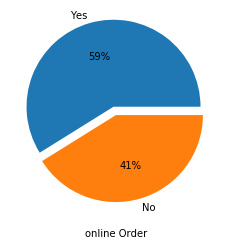

In [0]:
#online Order
slices=df['online_order'].value_counts().values
labels=df['online_order'].value_counts().index
explode = (0.1, 0)
plt.pie(slices,labels=labels,explode = explode,autopct="%.0f%%")
explode = explode
plt.xlabel("online Order")
plt.show()



    As clearly indicated,almost 60 per cent of restaurants in Banglore accepts online orders.
    Nearly 40 per cent of the restaurants do not accept online orders.
    This might be because of the fact that these restaurants cannot afford to pay commission to zomoto for giving them orders online. zomato may want to consider giving them some more benefits if they want to increse the number of restaurants serving their customers online.



# 3.What is the ratio b/w restaurants that provide and do not provide table booking ? 

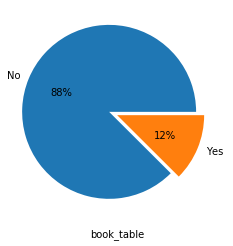

In [0]:
#book_table
slices=df['book_table'].value_counts().values
labels=df['book_table'].value_counts().index
explode = (0.1, 0)
plt.pie(slices,labels=labels,explode = explode,autopct="%.0f%%")
explode = explode
plt.xlabel("book_table")
plt.show()




    Almost 90 percent of restaurants in Banglore do not provide table booking facility.
    In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.
   


# 4.Rating distribution

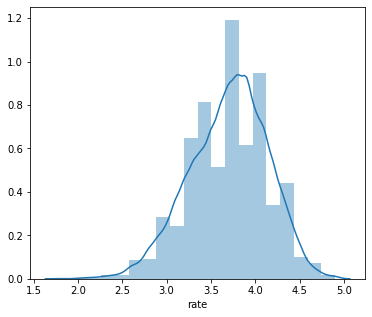

In [0]:
plt.figure(figsize=(6,5))
rating=df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)



    Almost more than 50 percent of restaurants has rating between 3 and 4.
    Restaurants having rating more than 4.5 are very rare.




# 5.Cost vs rating

In [0]:
cost_dist=df[['rate','approx_cost(for two people)','online_order']].dropna()
#here dropna used to drop rows that contains nan values
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if(len(x)>3) else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

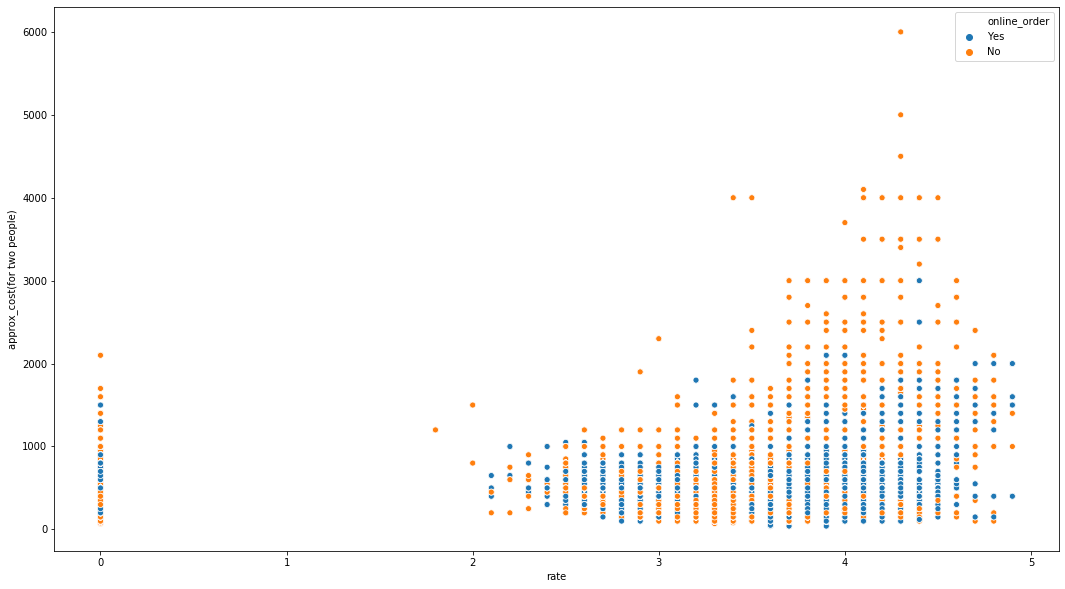

In [0]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=cost_dist)
plt.show()


#6.Distribution of cost for two people

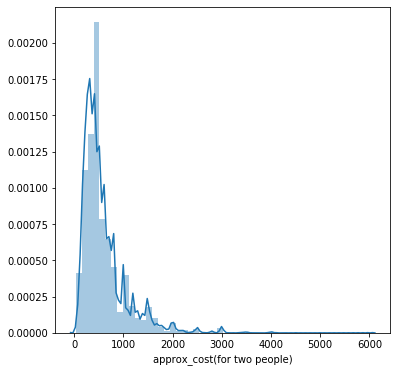

In [0]:
plt.figure(figsize=(6,6))
sns.distplot(cost_dist['approx_cost(for two people)'])
plt.show()
#follow link for skew and kurtosis
#https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa



    We can see that the distribution if left skewed.
    This means almost 90percent of restaurants serve food for budget less than 1000 INR.($15)



#7.Is there any difference b/w votes of restaurants accepting and not accepting online orders?

In [0]:
votes_yes=df[df['online_order']=="Yes"]['votes']
trace0=go.Box(y=votes_yes,name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))

votes_no=df[df['online_order']=="No"]['votes']
trace1=go.Box(y=votes_no,name="Not accepting online orders",
              marker = dict(
        color = 'rgb(0, 128, 128)',
    ))

layout = go.Layout(
    title = "Box Plots of votes",width=800,height=500
)

data=[trace0,trace1]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)



    Yes,you can observe that median number of votes for both categories vary.
    Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.




#8.Which are the most common restaurant type in Banglore?

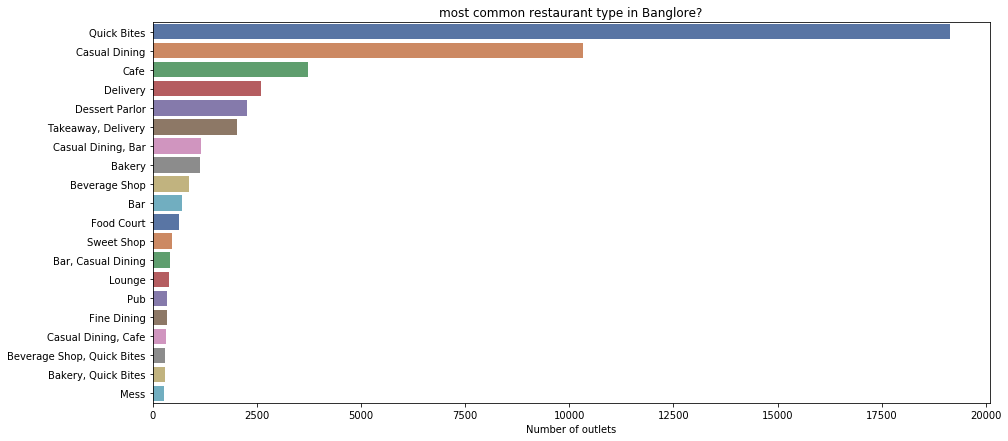

In [0]:
rst=df['rest_type'].value_counts()[:20]
plt.figure(figsize=(15,7))
sns.barplot(x=rst,y=rst.index,palette='deep')
plt.title("most common restaurant type in Banglore?")
plt.xlabel("Number of outlets")
plt.show()




    No doubt about this as Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
    We can observe tha Quick Bites type restaurants dominates.




# 9.Cost factor ?

In [0]:
trace0=go.Box(y=df['approx_cost(for two people)'],name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=500,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)




    The median approximate cost for two people is 400 for a single meal.
    50 percent of restaurants charge between 300 and 650 for single meal for two people.




#10.Finding Best budget Restaurants in any location


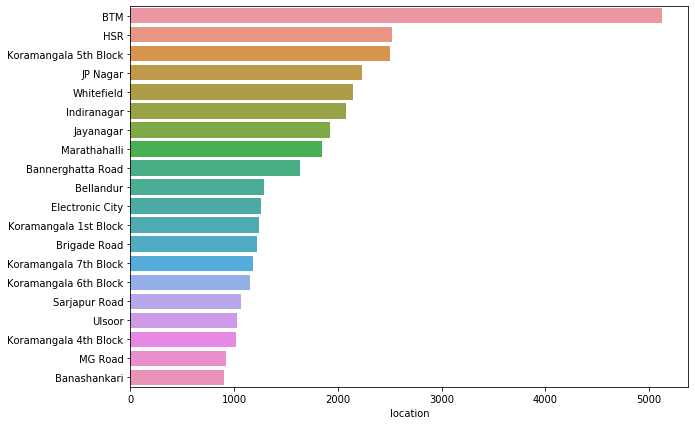

In [0]:
plt.figure(figsize=(10,7))
best_budget_rest=df['location'].value_counts()[:20]
sns.barplot(x=best_budget_rest,y=best_budget_rest.index)
plt.show()



---


    We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
    BTM dominates the section by having more than 5000 restaurants.




# 11.Extracting location information using Geopy 

In [0]:
#https://pypi.org/project/geopy/
locations=pd.DataFrame({"Name":df['location'].unique()})
locations=locations.dropna()
locations=locations.reset_index(drop=True)
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))


In [0]:
geolocator = Nominatim(user_agent="app")
lat=[]
lag=[]
for location in locations['Name']:
  loc= geolocator.geocode(location)
  if loc is None:
    lat.append(0)
    lag.append(0)
  else:
    lat.append(loc.latitude)
    lag.append(loc.longitude)    





    We have found out latitude and longitude of each location listed in the dataset using geopy.
    This is used to plot maps.



#12.Heatmap of restaurant count on each location 
Folium is a Python Library that can allow us to visualize spatial data in an interactive manner, straight within the notebooks environment many (at least myself) prefers. The library is highly intuitive to use, and it offers a high degree of interactivity with a low learning curve. Best of all, it is al


In [0]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])#remove "Bangalore" from names only contains localities
locations.head()

In [0]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())#count rest location how many time repeat in dataset
Rest_locations.columns=['Name','count']#reset column name
Rest_locations['lat']=lat #make a column latitude using lat list
Rest_locations['lon']=lag #make column longitude using lag list

In [0]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=12)
    return base_map

In [0]:

basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

#13.Which are the most popular cuisines of Bangalore?


In [0]:
most_cuisines=df['cuisines'].value_counts()[:10]
plt.figure(figsize=(10,7))
sns.barplot(x=most_cuisines,y=most_cuisines.index)
plt.ylabel("cuisines names")
plt.show()

We can observe that North Indian,chinese,South Indian and Biriyani are most common.
Is this imply the fact that Banglore is more influenced by North Indian culture more than South?

#14.Heatmap of North Indian restaurants


In [0]:
North_india= df[(df['cuisines']=='North Indian')]['location'].value_counts().reset_index()#extract restaurants which has North Indian cuisine 
North_india.columns=['Name','count']

In [0]:
North_india['Lat']=North_india['Name'].apply(lambda x:float(Rest_locations[Rest_locations['Name']==x]['lat']))
North_india['Lon']=North_india['Name'].apply(lambda x:float(Rest_locations[Rest_locations['Name']==x]['lon']))

In [0]:
basemap=generateBaseMap()
HeatMap(North_india[['Lat','Lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

Interesting to see a cluster of North Indian Restaurants in South Bangalore area !
This may indicate that these areas are more populated by North Indians.


#15.What about South Indian cuisines?

In [0]:
south_india= df[(df['cuisines']=='South Indian')]['location'].value_counts().reset_index()#extract restaurants which has south Indian cuisine 
south_india.columns=['Name','count']

In [0]:
south_india['Lat']=south_india['Name'].apply(lambda x:float(Rest_locations[Rest_locations['Name']==x]['lat']))
south_india['Lon']=south_india['Name'].apply(lambda x:float(Rest_locations[Rest_locations['Name']==x]['lon']))

In [0]:
basemap=generateBaseMap()
HeatMap(south_india[['Lat','Lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

#Analysing Restaurant chains

In [0]:
df1=df[(df['rest_type']=='Casual Dining')][['rest_type','name']] #create df1 dataframe that have only Casual Dining rest 
df1['name'].value_counts()[:5] #print top 5 rest

We can see tht Empire restaurant,Beijing bites and Mani's dum biriyani are the most popular casual dining restaurant chains in Bangalore.

#Analysing Reviews
---
In this section we will go on to prepare reviews dataframe.

We will extract reviews and ratings of each restaurant and create a dataframe with it.

In [0]:
zip_obj=zip(df['name'],df['reviews_list'])#zip name and 'reviews_list' columns for extract ratings and reviews
zip_list=list(zip_obj) #zip object is convert into list
all_ratings = []
for name,ratings in zip_list:
  ratings=eval(ratings) #The eval() method parses the expression passed to it and runs python expression(code) within the program.
  for score,doc in ratings:
    if score:
      score=float(score.strip('Rated').strip())
      doc=doc.strip('RATED\n').strip()
      all_ratings.append([name,score,doc])

In [0]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x:re.sub('[^a-zA-Z0-9\s]',"",x))

#Rating distribution

In [0]:
plt.figure(figsize=(7,6))
rating=rating_df['rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

#Topic modelling

---
We will do topic modelling for postive and negative comments seperately to understand the different between the two types.

#Topic modeling for positive comments
As the first step we will divide comments as negative and positive on the basis on rating provided.
Comments with rating below 2.5 is classified as negative and greater than 2.5 as classified as positive.


In [132]:
rating_df.head(2)

,name,rating,review,sent
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...,1
1,Jalsa,4.0,I was here for dinner with my family on a week...,1


In [0]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)



---
Now,

we will remove stopwords

Lemmatize each word

Create corpus

Tokenize them



In [0]:
corpus=[]
for i in range(0, rating_df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', rating_df['review'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]#remove stopword like url,links,a an the etc
    
    #lem = WordNetLemmatizer() #Another way of finding root word
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [131]:
#https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/


1

In [0]:
corpus